# Were catholic areas of Germany less likely to support the Nazi party?



This project intends to investigate if Catholic areas of Germany were less likely to support the Nazi party in the elections held in November 1932.





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
sns.set()

df = pd.read_csv('reichstag.csv')

## Exploring the descriptive statistics

In [9]:
df.describe(include = 'all')

,nsdap_share,pct_catholic,pct_jewish,pct_other_rel,pct_women,log_population,female_workforce,urban_county,unemp_white_collar,unemp_blue_collar,unemp_domestic,industry_manufacturing,industry_trade,industry_services,industry_domestic,distance_to_berlin,literacy_rate,bavaria,log_income_per_capita,religiosity
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,397.000000,982.000000,982.000000,779.000000
mean,27.768552,36.311918,0.532893,2.144964,47.220188,10.432123,37.813095,0.267821,14.961861,24.939465,10.896228,28.956254,14.157055,7.626701,3.500647,351.496692,90.178857,0.218941,7.412508,0.499358
std,11.462715,37.581153,0.939980,2.723325,13.439535,1.768615,14.213634,0.443049,6.692085,12.167682,6.102439,16.113047,10.117350,6.393117,2.327783,152.821738,9.060698,0.413739,1.938009,0.500321
min,4.313055,0.303951,0.000000,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.948739,43.146183,0.000000,0.000000,0.000000
25%,18.491055,3.570963,0.065253,0.311681,50.008022,10.202277,31.806830,0.000000,11.065729,16.157795,7.112497,16.479064,7.221122,3.817740,2.042122,227.693631,88.978836,0.000000,7.723540,0.000000
50%,27.751987,15.526534,0.257111,1.199995,50.734699,10.613480,40.114965,0.000000,15.127087,24.828549,10.471687,27.334899,10.895078,5.511930,2.869380,364.586078,93.272995,0.000000,7.853368,0.000000
75%,35.662932,79.450560,0.662945,2.865107,51.620101,11.089145,47.427110,1.000000,19.139761,33.539938,14.060931,39.769351,18.456141,9.245041,4.527771,476.610259,95.771164,0.000000,8.053254,1.000000
max,68.578972,99.758736,12.982320,19.699999,59.929920,13.891662,62.507015,1.000000,35.757217,59.834499,39.898689,77.966705,55.287445,63.493351,23.111143,683.165129,99.331673,1.000000,9.518550,1.000000


 ####  Visualisation

Visualising key variables that will be used in the regression.



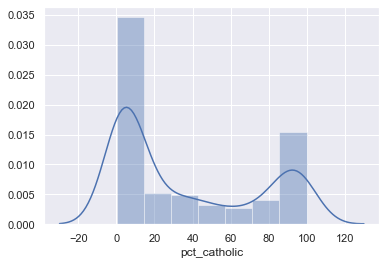

In [11]:
sns.distplot(df['pct_catholic'])

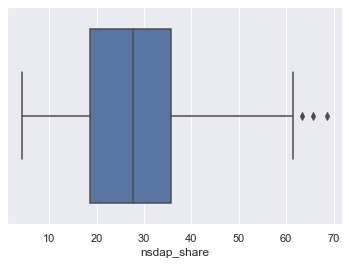

In [4]:
sns.boxplot(df['nsdap_share'])

#### Dealing with missing values (clean dataframe)

In [3]:
dfLR = df[['nsdap_share' , 'pct_catholic']]
dfLR = dfLR.dropna()

#### Solving linear regression

In [5]:
yLR = dfLR['nsdap_share']
xLR = dfLR['pct_catholic']
XLR = sm.add_constant(xLR)
rLR = sm.OLS(yLR , XLR).fit()

#Making regression table for significant values: 
regressionAnalysis = np.array([ rLR.params[1] , rLR.rsquared, rLR.pvalues[1],
                              rLR.tvalues[1]])

table1 = pd.DataFrame(regressionAnalysis, index = [ 'slope','rsquared',
                            'pvalue', 't-stat'], columns = ['pct_catholic'])



table1

,pct_catholic
slope,-2.134060e-01
rsquared,4.895288e-01
pvalue,2.929326e-145
t-stat,-3.065608e+01


#### Plotting regression fit

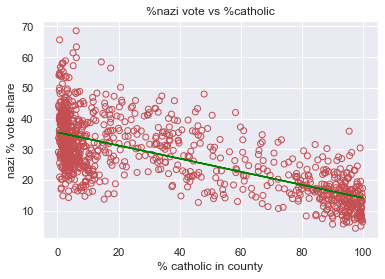

In [6]:
#Define regression line for plt
xeq = dfLR['pct_catholic']
yeq = -0.2134 * xeq + 35.5177
b, meq = polyfit(xeq, yeq, 1)


plt.scatter(dfLR['pct_catholic'], dfLR['nsdap_share']
            ,facecolors = 'none', edgecolors = 'r')
plt.xlabel( '% catholic in county')
plt.ylabel( 'nazi % vote share')
plt.title( '%nazi vote vs %catholic')
plt.plot(xeq, b+ meq*xeq, c= 'green')

As our independent variable increases the dependent variable decreases outlined by the -0.2134 coefficient. This seems to suggest that if a county is 'more'  catholic then it is less likely to support the Nazi party. The coefficient also has a P-value lower than 0.05 showing that pct_catholic is a significant variable.

An r-squared value of 0.490 implies that this regression accounts for almost half of the variability. For a topic so complex, a regression that explains almost half of the variability is very high.

## Multiple Linear Regression

Topics this complex requires insight into potential predictor variables and knowing how multiple independent variables vary with respect to nsdap_share.
To prepare there will be some further EDA on variables of interest. 
Variables that give low rsquared values


Here I will make a function that runs a single linear regression of nsdap_share vs every viable explanatory variable and return the rsquared value, this will help determine what variables might be best to use when carrying out the multiple linear regression.

#### Multiple Linear Regression prep



C:\Users\Work\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Work\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


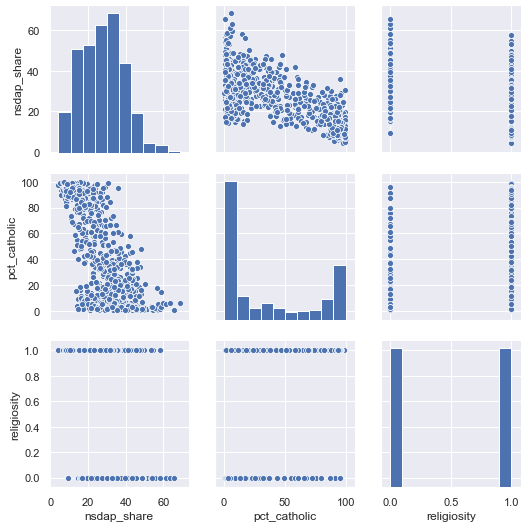

In [7]:
XDF = df[['nsdap_share','pct_catholic','religiosity']]
sns.pairplot(XDF)